* Load data
* Load xml. Get I(d) for pack C26T

The xml only changes C26T pack, which was fit to difc and L2

# Load data

In [1]:
workdir = '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/'
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/SEQ


In [2]:
# setup plotting
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np, os

In [3]:
import os
from mantid import simpleapi as msa, mtd

In [4]:
%%time
# about 4min
orig_ws = msa.LoadEventNexus(
    Filename="/SNS/SEQ/IPTS-19573/nexus/SEQ_130249.nxs.h5", FilterByTimeStart=0, FilterByTimeStop=2000)

CPU times: user 3min 5s, sys: 1min 2s, total: 4min 7s
Wall time: 37.4 s


# Old I(d)

In [5]:
%%time
I_d_0 = msa.ConvertUnits(InputWorkspace=orig_ws, Target='dSpacing', EMode='Elastic')
I_d_0 = msa.Rebin(InputWorkspace=I_d_0, Params='2,0.01,11')

CPU times: user 35.5 s, sys: 1min 17s, total: 1min 52s
Wall time: 1min 52s


In [6]:
c26t_I_d_0 = msa.SumSpectra(InputWorkspace=I_d_0, StartWorkspaceIndex=63488, EndWorkspaceIndex=64511)

In [7]:
xbb0 = c26t_I_d_0.readX(0); y0 = c26t_I_d_0.readY(0).copy()
x0 = (xbb0[1:] + xbb0[:-1])/2

# New I(d)

In [8]:
msa.LoadInstrument(orig_ws, Filename='./SEQ_new.xml.fit-to-difc-and-L2_Si+C60', RewriteSpectraMap=False)

array([-2, -1], dtype=int32)

In [9]:
%%time
I_d_1 = msa.ConvertUnits(InputWorkspace=orig_ws, Target='dSpacing', EMode='Elastic')
I_d_1 = msa.Rebin(InputWorkspace=I_d_1, Params='2,0.01,11')

CPU times: user 37.8 s, sys: 46.3 s, total: 1min 24s
Wall time: 1min 24s


In [10]:
c26t_I_d_1 = msa.SumSpectra(InputWorkspace=I_d_1, StartWorkspaceIndex=63488, EndWorkspaceIndex=64511)

In [11]:
xbb1 = c26t_I_d_1.readX(0); y1 = c26t_I_d_1.readY(0).copy()
x1 = (xbb1[1:] + xbb1[:-1])/2

<IPython.core.display.Javascript object>


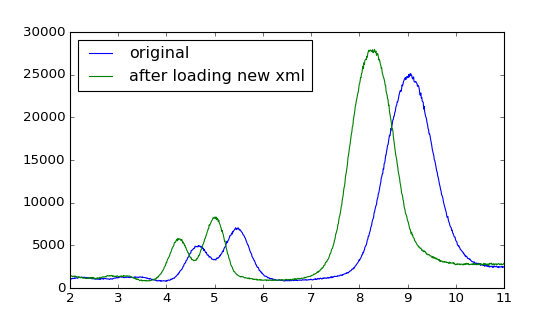

In [12]:
plt.figure(figsize=(7,4))
plt.plot(x0, y0, label='original')
plt.plot(x1, y1, label='after loading new xml')
# plt.xlim(3,3.3)
plt.legend(loc='upper left')